### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 5000, n_features = 2, centers = 3, cluster_std= 0.6, random_state=66)

In [3]:
X.shape

(5000, 2)

In [4]:
sc = StandardScaler()
X_transformed = sc.fit_transform(X)

### Data Visualization

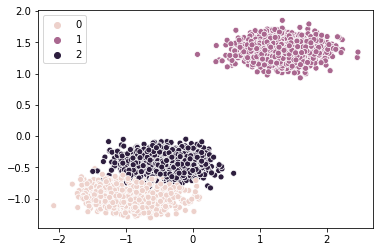

In [5]:
sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=y)

### Modeling

In [30]:
def accuracy(kmeans, X, y):
    correct = 0
    for i in range(len(X)):
        predict_me = np.array(X[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = kmeans.predict(predict_me)
        #print(prediction[0], y[i])
        if prediction[0] == y[i]:
            correct += 1

    return correct/len(X)

In [38]:
kmeans = KMeans(n_clusters=3, random_state= 77, n_jobs= -1)
parameters = {'max_iter':range(1,20,1)}
clf = GridSearchCV(kmeans, parameters, cv=3)
clf.fit(X_transformed,y)
clf.best_params_

{'max_iter': 5}

In [39]:
print(accuracy(clf.best_estimator_, X_transformed, y))

0.925
